<a href="https://colab.research.google.com/github/kuldeep-alt/EDA_TH_TASK_BDS360/blob/main/EDA_THEORY_TASK_BDS360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Explore the Dataset

In [2]:
import pandas as pd

# Upload the dataset directly
from google.colab import files
uploaded = files.upload()



Saving restaurants (1).csv to restaurants (1) (1).csv


In [10]:
# Load the dataset
df = pd.read_csv('restaurants (1).csv')


Explore Dataset Dimensions and Summary

In [12]:
#dataset dimensions
print("Dimensions:", df.shape)

# first few rows to understand the data structure
df.head()

# Summary statistics for numerical features
df.describe()

# Info about data types and null values
df.info()


Dimensions: (130, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_ID    130 non-null    int64  
 1   Name             130 non-null    object 
 2   City             130 non-null    object 
 3   State            130 non-null    object 
 4   Country          130 non-null    object 
 5   Zip_Code         56 non-null     float64
 6   Latitude         130 non-null    float64
 7   Longitude        130 non-null    float64
 8   Alcohol_Service  43 non-null     object 
 9   Smoking_Allowed  130 non-null    object 
 10  Price            130 non-null    object 
 11  Franchise        130 non-null    object 
 12  Area             130 non-null    object 
 13  Parking          65 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 14.3+ KB


Data Cleaning and Handling Missing Values

In [16]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop or fill missing values (example of filling with mean for numerical columns)
# Select only numerical columns for calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Fill missing values in numerical columns with their respective means
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())


Missing values per column:
Restaurant_ID       0
Name                0
City                0
State               0
Country             0
Zip_Code           74
Latitude            0
Longitude           0
Alcohol_Service    87
Smoking_Allowed     0
Price               0
Franchise           0
Area                0
Parking            65
dtype: int64


Univariate Analysis

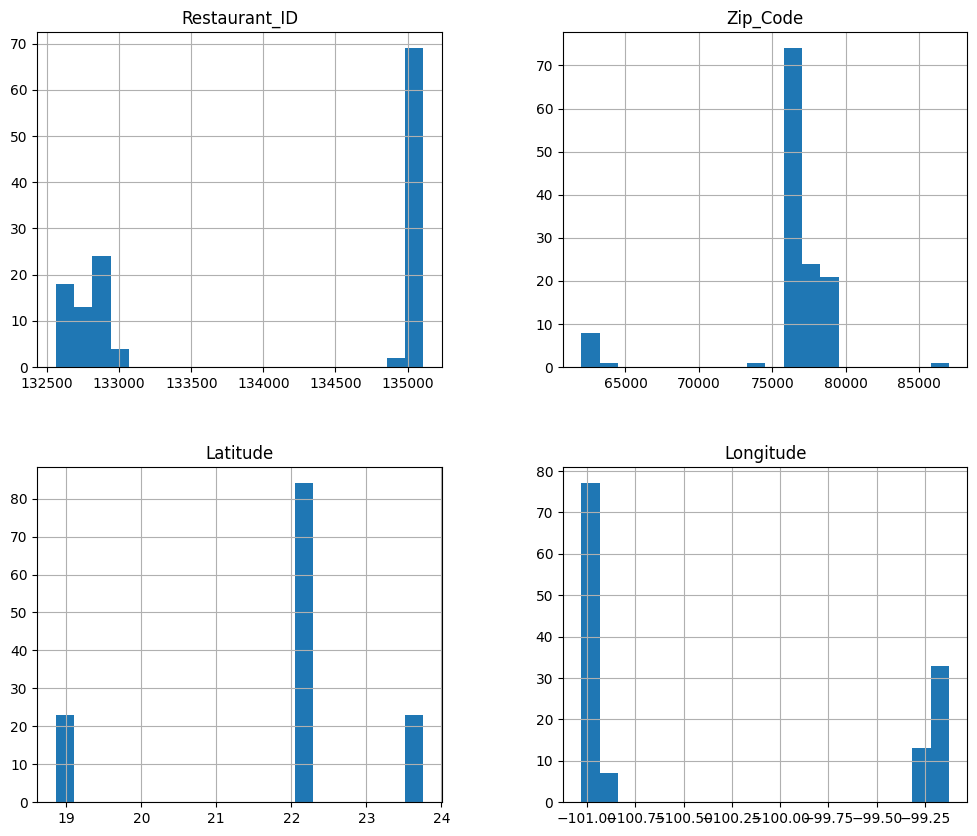

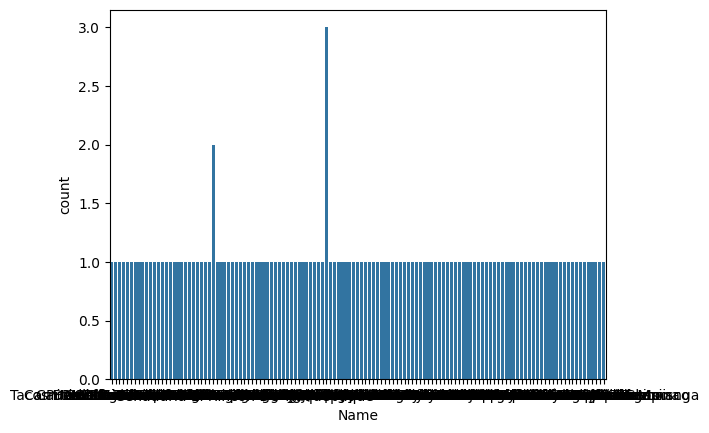

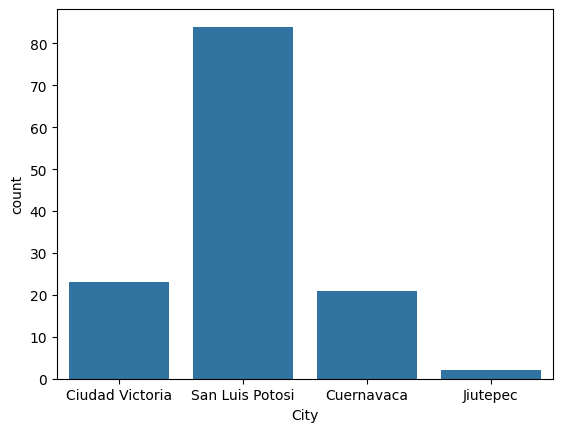

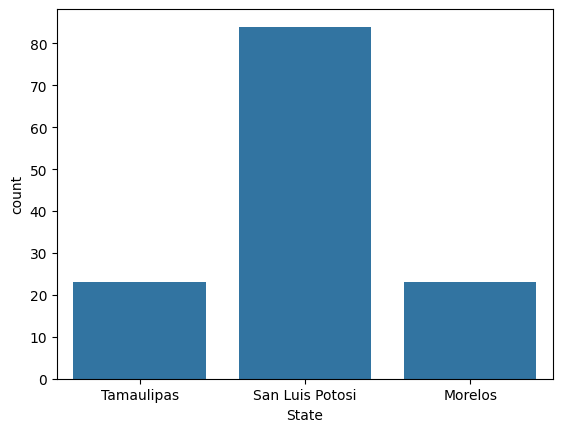

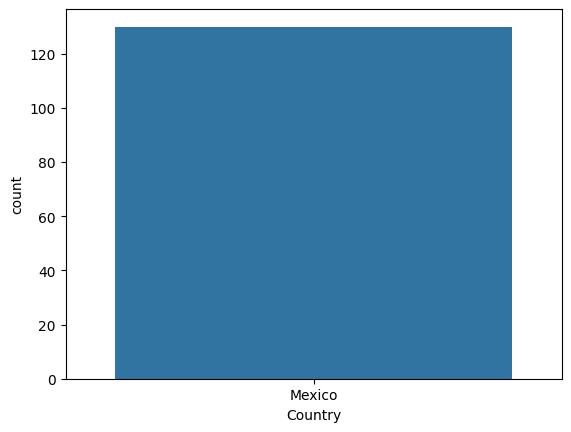

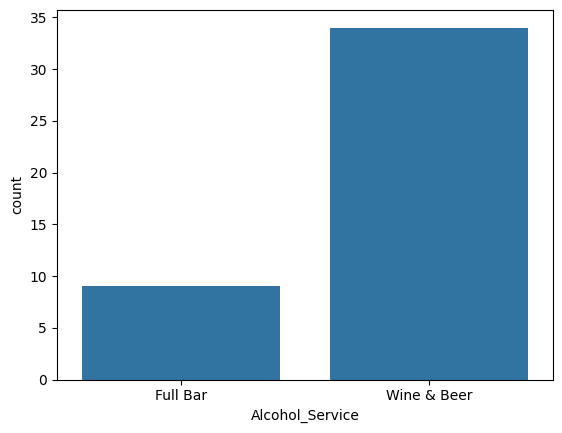

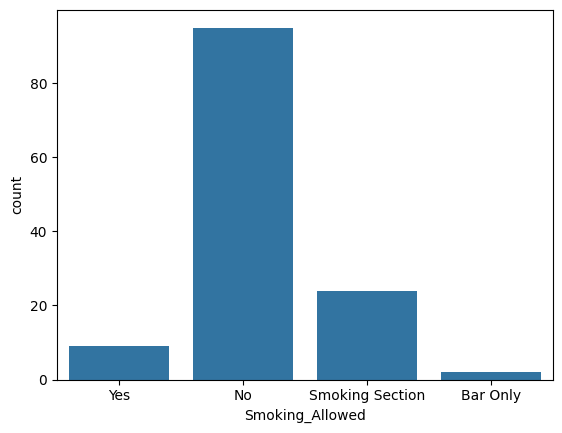

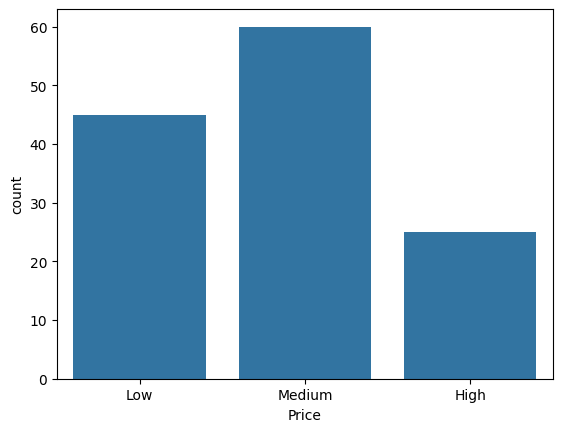

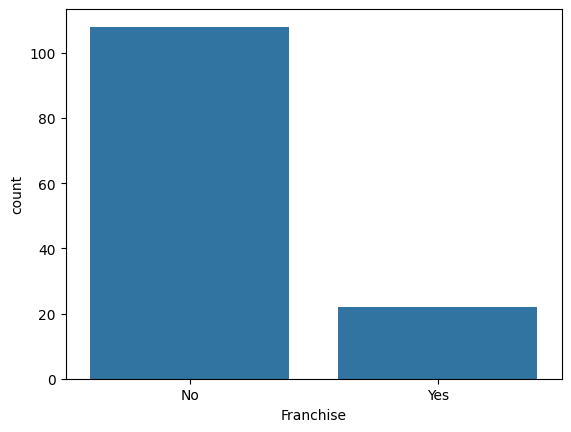

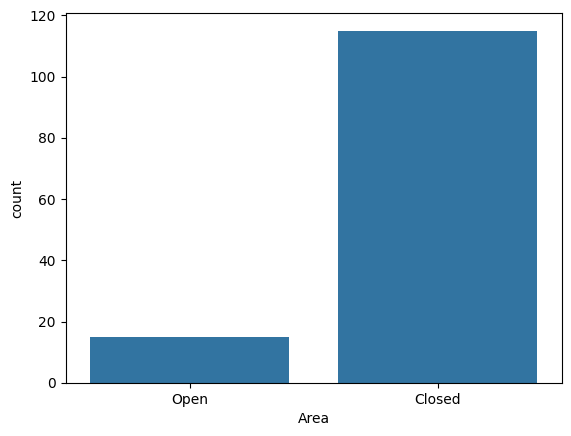

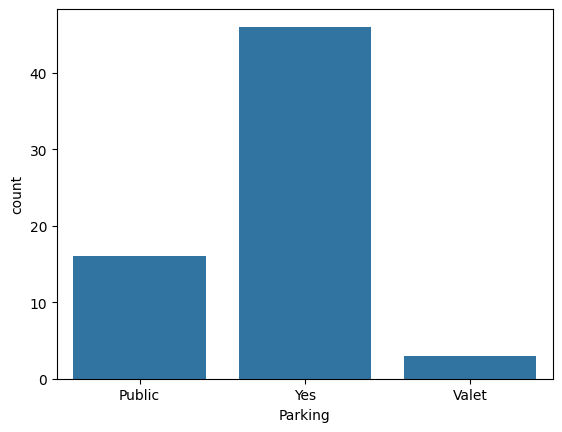

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for continuous variables
df.hist(bins=20, figsize=(12, 10))
plt.show()

# Count plots for categorical variables
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=col)
    plt.show()

Bivariate Analysis

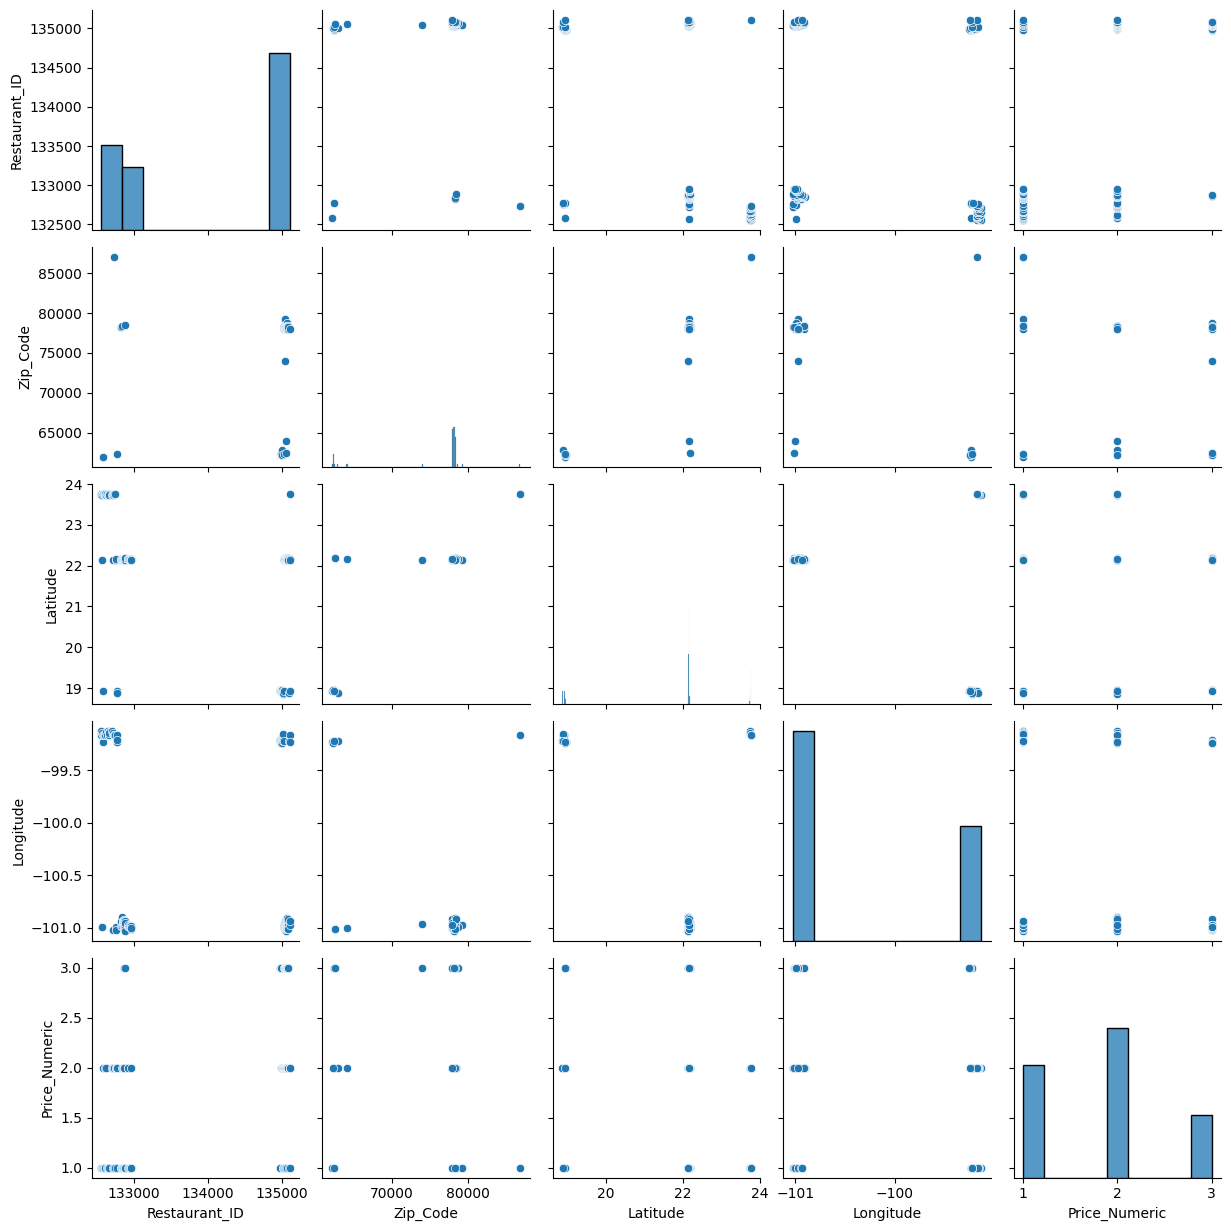

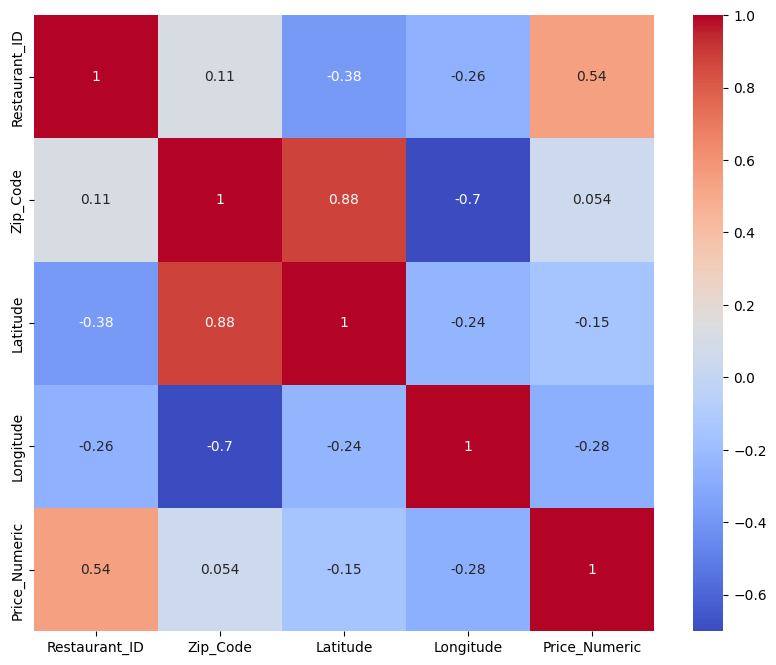

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for scatter plots of numerical features
sns.pairplot(df)
plt.show()

# Set figure size and create heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


Multivariate Analysis

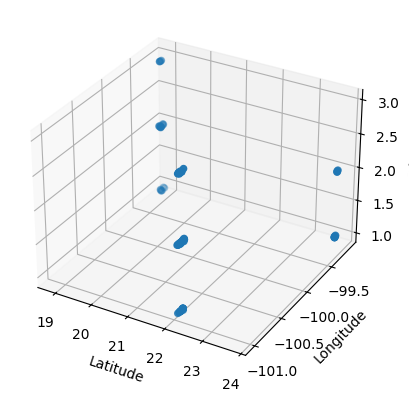

                 Restaurant_ID      Zip_Code   Latitude   Longitude  \
City                                                                  
Ciudad Victoria  132755.347826  87018.000000  23.745717  -99.155931   
Cuernavaca       134574.333333  62301.428571  18.912971  -99.219728   
Jiutepec         133893.000000           NaN  18.878549  -99.161224   
San Luis Potosi  134219.547619  77524.000000  22.149658 -100.976882   

                 Price_Numeric  
City                            
Ciudad Victoria       1.304348  
Cuernavaca            1.904762  
Jiutepec              1.500000  
San Luis Potosi       1.988095  


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and map 'Price' to numeric
df = pd.read_csv("restaurants (1).csv")
df['Price_Numeric'] = df['Price'].map({'Low': 1, 'Medium': 2, 'High': 3})

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Latitude'], df['Longitude'], df['Price_Numeric'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Price")
plt.show()

# Grouped statistics by City
print(df.groupby('City').mean(numeric_only=True))


Model Building with Confusion Matrix and Metrics

Confusion Matrix:
 [[3 0 0]
 [0 0 0]
 [0 1 0]]

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


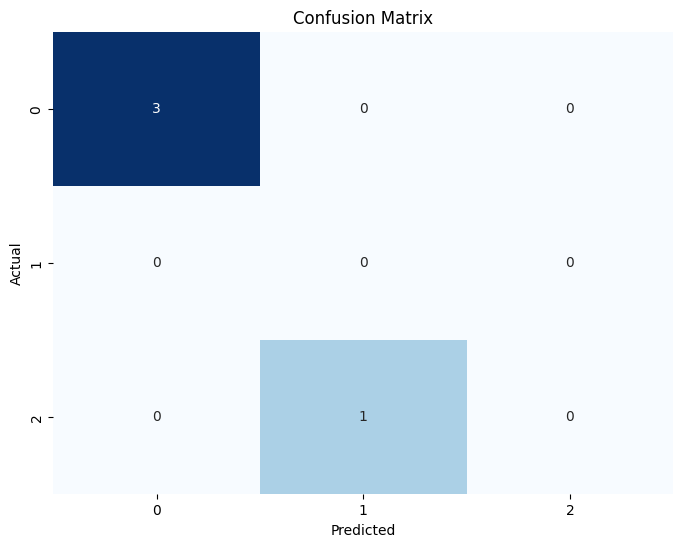

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
data = df.dropna()
label_encoders = {col: LabelEncoder() for col in ['Price', 'Alcohol_Service', 'Smoking_Allowed', 'Franchise', 'Area', 'Parking']}
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

data = data.drop(['Restaurant_ID', 'Name', 'City', 'State', 'Country', 'Zip_Code'], axis=1)

# Split data
X, y = data.drop('Price', axis=1), data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics and Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
